<a href="https://colab.research.google.com/github/Priangshu-18/Face-Mask-Detection-System-using-CNN/blob/main/Face_Mask_Detection_System_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the face mask dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 57% 93.0M/163M [00:00<00:00, 970MB/s]
100% 163M/163M [00:00<00:00, 728MB/s] 


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3241.jpg', 'with_mask_344.jpg', 'with_mask_1061.jpg', 'with_mask_3686.jpg', 'with_mask_2402.jpg']
['with_mask_1438.jpg', 'with_mask_2054.jpg', 'with_mask_1519.jpg', 'with_mask_1291.jpg', 'with_mask_3701.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2144.jpg', 'without_mask_3409.jpg', 'without_mask_1601.jpg', 'without_mask_560.jpg', 'without_mask_1460.jpg']
['without_mask_3295.jpg', 'without_mask_238.jpg', 'without_mask_3729.jpg', 'without_mask_396.jpg', 'without_mask_269.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Label for the two class

with mask --> 1

without mask --> 2

In [10]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

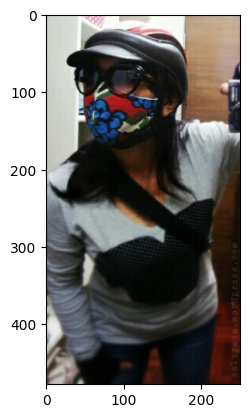

In [12]:
# Displaying with mask images
img = mping.imread('/content/data/with_mask/with_mask_3241.jpg')
imgplot = plt.imshow(img)
plt.show()

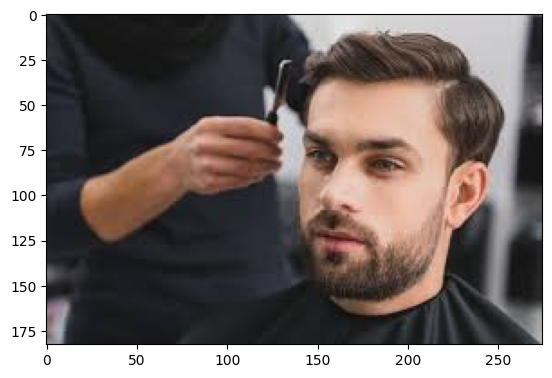

In [13]:
# Displaying without mask images
img = mping.imread('/content/data/without_mask/without_mask_3409.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the image

2. Convert the images into numpy array

In [15]:
data = []

with_mask_path = '/content/data/with_mask/'

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
len(data)

7553

In [17]:
type(data)

list

array([[[201, 204, 197],
        [206, 209, 202],
        [209, 212, 205],
        ...,
        [191, 171, 160],
        [189, 170, 160],
        [188, 169, 159]],

       [[196, 199, 192],
        [203, 206, 199],
        [208, 211, 204],
        ...,
        [192, 174, 157],
        [191, 172, 156],
        [189, 169, 153]],

       [[205, 208, 201],
        [206, 209, 202],
        [208, 211, 204],
        ...,
        [195, 177, 160],
        [197, 176, 161],
        [195, 173, 159]],

       ...,

       [[ 87,  75,  63],
        [113, 103,  92],
        [146, 136, 128],
        ...,
        [ 48,  21,  13],
        [ 45,  14,   7],
        [ 50,  14,   8]],

       [[ 68,  58,  53],
        [ 89,  80,  75],
        [114, 106, 103],
        ...,
        [ 49,  17,   7],
        [ 50,  16,   7],
        [ 52,  14,   7]],

       [[ 65,  55,  53],
        [ 96,  86,  85],
        [140, 132, 131],
        ...,
        [ 54,  17,   9],
        [ 54,  16,   9],
        [ 55,  12,   8]]], dtype=uint8)
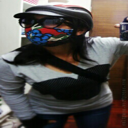

In [18]:
data[0]

In [19]:
data[0].shape

(128, 128, 3)